In [17]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/cambridgecoding/machinelearningregression/master/data/bikes.csv')
data.head(3)

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.0
1,2011-01-04,2.896673,54.267219,15.136882,108.0
2,2011-01-05,4.235654,45.697702,17.034578,82.0


In [18]:
data['date'] = data['date'].apply(pd.to_datetime)
data['year'] = [i.year for i in data['date']]
data['month'] = [i.month_name()[0:3] for i in data['date']]
data['day'] = [i.day_name()[0:3] for i in data['date']]

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

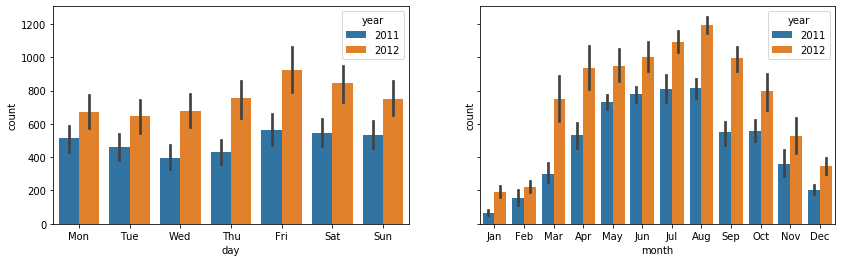

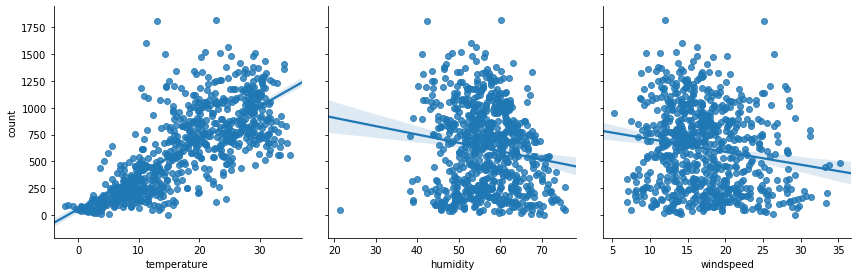

In [20]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,4), sharey=True)
bp1 = sns.barplot(data=data, x='day', y='count', hue='year', ax=ax1)
bp2 = sns.barplot(data=data, x='month', y='count', hue='year', ax=ax2)
pp = sns.pairplot(data=data,
y_vars=['count'],
x_vars=['temperature', 'humidity', 'windspeed'],
kind='reg',
height=4)

In [21]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
x = data[['temperature', 'humidity', 'windspeed']]
y = data['count']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)
classifier = linear_model.LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error

R^2 score: 0.75
MAE score: 153.54
EVS score: 0.75


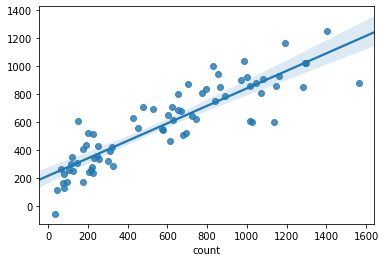

In [23]:
predictions = classifier.predict(X_test)
print(f'R^2 score: {r2_score(y_true=y_test, y_pred=predictions):.2f}')
print(f'MAE score: {mean_absolute_error(y_true=y_test, y_pred=predictions):.2f}')
print(f'EVS score: {explained_variance_score(y_true=y_test, y_pred=predictions):.2f}')
rp = sns.regplot(x=y_test, y=predictions)
r2_score: 0.54
MAE_score: 198.39
EVS_score: 0.54

In [24]:
import pickle
with open('C:/Users/SSIM STUDENT/Deployment-flask-master/bike_model.pkl', 'wb') as file: 
    pickle.dump(classifier, file)